In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Take data from Kaggke
# Telephone Churn Prediction

# Load the Data

In [3]:
telco_df=pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\Python Practise\Project\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [22]:
telco_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [23]:
telco_df.shape

(7043, 21)

In [24]:
telco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# As Senior Citizen are categorical hence 25%,50%,75% distribution is not proper.
##Also understand 75% customer are less than 55 month tenure
## The average monthly charges are 64.75USD.

In [4]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [154]:
telco_df.shape

(7043, 21)

In [ ]:
# Checking Target Variable

In [6]:
telco_df["Churn"].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [ ]:
# Visually

<AxesSubplot:xlabel='Churn', ylabel='count'>

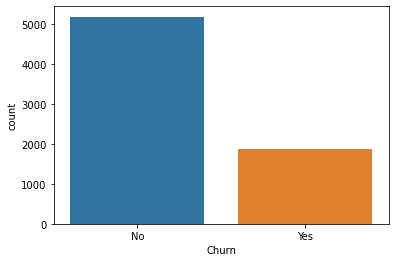

In [5]:
sns.countplot(data=telco_df,x='Churn')

In [ ]:
# As target variable is inbalance we need to balance that.

# Data Preprocessing

In [ ]:
# Missing Value

In [7]:
telco_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# As there is no missing value in data 
# First we check the % of Missing value and check further treatment either drop of fill the value.
# If there is numerical feature we can treat with mean using fillna 
# If there is categorical feature we can treat with mode using fillna 

In [ ]:
# Duplicate

In [9]:
telco_df.loc[telco_df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
# Outlier

In [10]:
telco_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# For Tenure

<AxesSubplot:xlabel='tenure'>

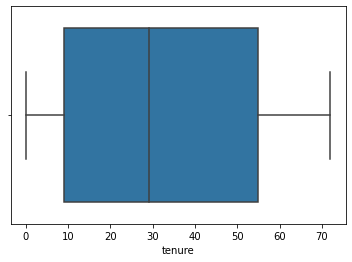

In [11]:
sns.boxplot(x='tenure',data=telco_df)

In [ ]:
#For MonthlyCharges

<AxesSubplot:xlabel='MonthlyCharges'>

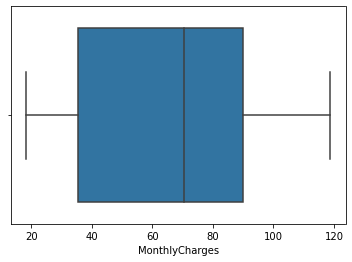

In [12]:
sns.boxplot(x='MonthlyCharges',data=telco_df)

In [ ]:
# As all point lies in the given upper fence and lower fence we say that there is no outlier.
# To treat outlier we have multiple treatment(treat with Median,Flooring capping,trimming)

In [ ]:
# Feature Selection Insight

In [ ]:
# As customer Id ,all id are unique so we can drop this feature.
# Also we drop tenure

In [13]:
telco_df.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Univariate Analysis

In [14]:
telco_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# As we know all insight in Numerical data we check Categorical data.

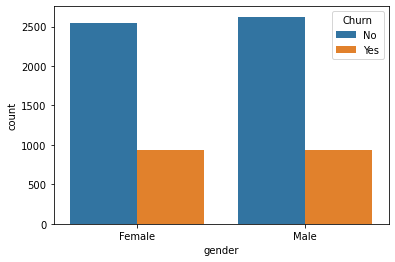

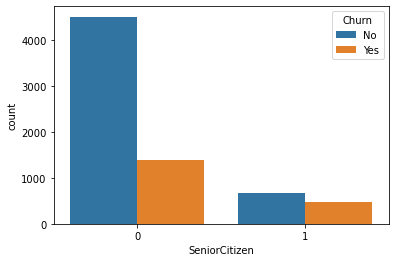

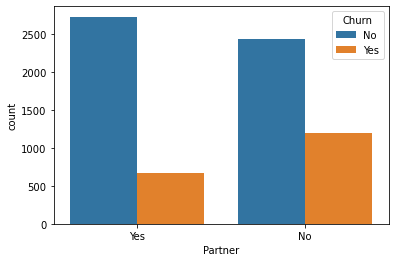

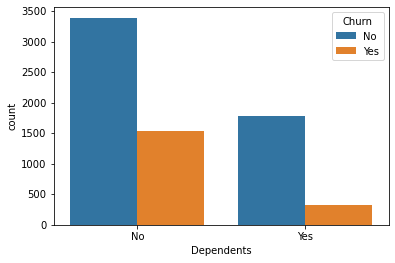

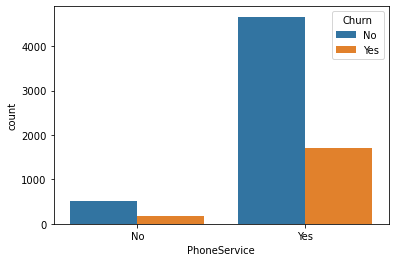

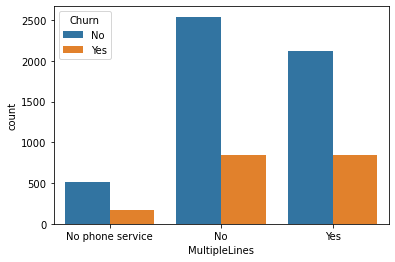

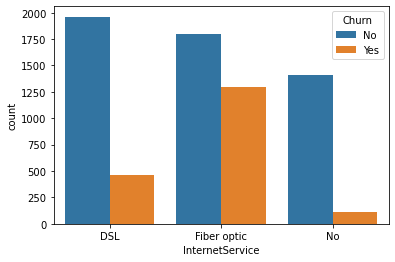

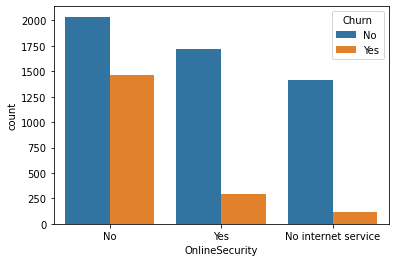

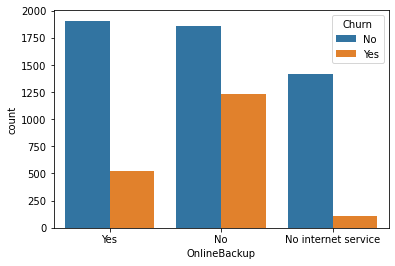

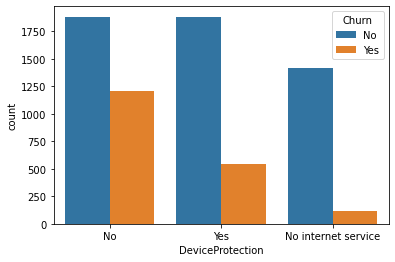

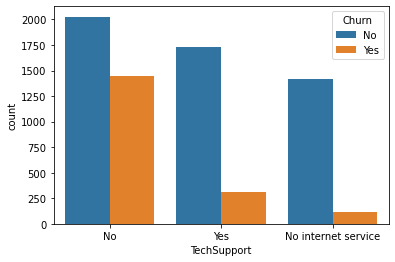

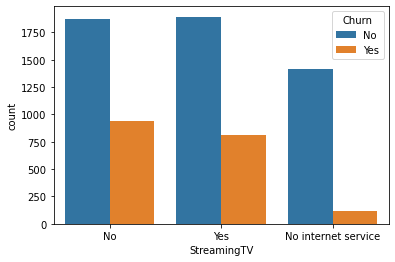

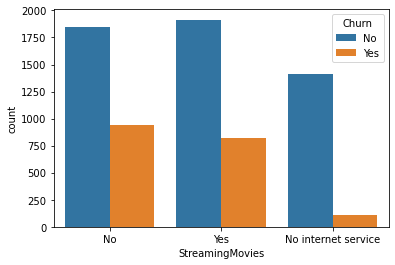

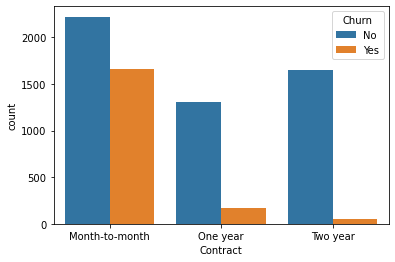

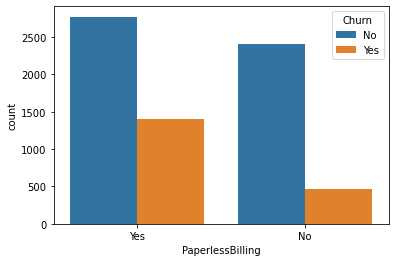

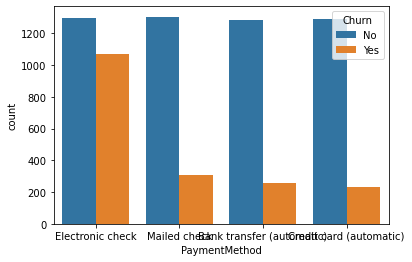

In [15]:
for i, predictor in enumerate(telco_df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_df, x=predictor, hue='Churn')

# Insight

In [ ]:
# High Churn rate in month to month contract,No online support,No tech support,first year subscription,fiber optics internet
# Low churn rate in long term contract,Subscription without internet service
# Feature like gender,Cust id have no impact on Churn

<AxesSubplot:>

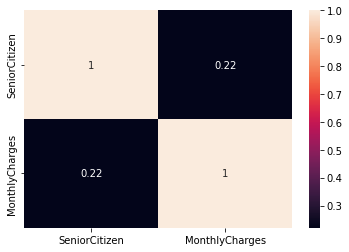

In [16]:
sns.heatmap(telco_df.corr(),annot=True)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

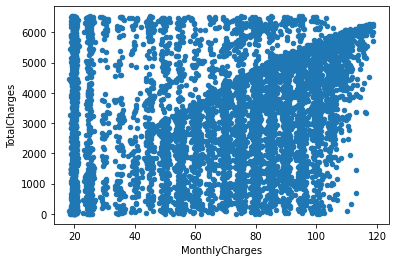

In [57]:
telco_df.plot.scatter('MonthlyCharges','TotalCharges')

In [ ]:
# Checking catagorical feature and numerical feature

In [17]:
telco_df['Churn']=np.where(telco_df.Churn == 'Yes',1,0)

In [18]:
cat_feature=telco_df.select_dtypes(include='object').columns
print("Categorical Features:\n",cat_feature,"\n No of Categorical Features:",len(cat_feature))

Categorical Features:
 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object') 
 No of Categorical Features: 16


In [ ]:
# TotalCharges is numeric feature

In [19]:
num_feature=telco_df.select_dtypes(exclude='object').columns
print("Numerical Features:\n",num_feature,"\n No of Numerical Features:",len(num_feature))

Numerical Features:
 Index(['SeniorCitizen', 'MonthlyCharges', 'Churn'], dtype='object') 
 No of Numerical Features: 3


In [ ]:
#Electronic check medium are the highest churners
#Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
#No Online security, No Tech Support category are high churners
#Non senior Citizens are high churners

In [ ]:
# Converting churn catagorical data to numerical(Binary)

In [20]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for feature in cat_feature:
    telco_df[feature]=le.fit_transform(telco_df[feature])

In [21]:
telco_df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


# Model Building

In [28]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [29]:
x=telco_df.drop('Churn',axis=1)
x

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660


In [30]:
y=telco_df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
# Decision Tree Classifier

In [34]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)


In [35]:
model_dt.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [36]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [37]:
model_dt.score(x_test,y_test)


0.7508871540099361

In [39]:
print(classification_report(y_test, y_pred, labels=[0,1]))


              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1021
           1       0.55      0.48      0.52       388

    accuracy                           0.75      1409
   macro avg       0.68      0.67      0.67      1409
weighted avg       0.74      0.75      0.75      1409



In [ ]:
# Logistic Classifier

In [40]:
model_lr=LogisticRegression()

In [41]:
model_lr.fit(x_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
y_pred=model_lr.predict(x_test)

In [43]:
confusion_matrix(y_test,y_pred)

array([[882, 139],
       [178, 210]], dtype=int64)

In [44]:
print(classification_report(y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1021
           1       0.60      0.54      0.57       388

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.77      1409



In [ ]:
# Random forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=6)

In [47]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=6, random_state=100)

In [48]:
y_pred=model_rf.predict(x_test)


In [51]:
model_rf.score(x_test,y_test)


0.7679205110007097

In [52]:
print(classification_report(y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1021
           1       0.62      0.42      0.50       388

    accuracy                           0.77      1409
   macro avg       0.71      0.66      0.67      1409
weighted avg       0.75      0.77      0.75      1409

